## Advanced Fst
   

In [1]:
import hfst_dev as hfst
import graphviz
import random

## Replacement rules
#### Standard replacement rule

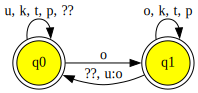

In [2]:
cons = hfst.regex('p | t | k')
defs = {"C":cons}
uo = hfst.regex('u -> o || o C* _ ',definitions=defs)
defs['uo'] = uo
uo.view()

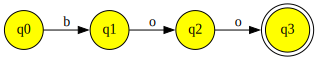

In [3]:
bou = hfst.regex('[{bou} .o. uo].l',
                         definitions=defs)
bou.view()

In [31]:
list(bou.extract_paths().keys())

['boo']

In [4]:
bokutu = hfst.regex('[{bokutu} .o. uo].l',
                         definitions=defs)
list(bokutu.extract_paths().keys())

['bokotu']

The rationale is that the second `u` is not in the input
context of an `o`.  

In [5]:
uo2 = hfst.regex('u -> o // o C* _ ',definitions=defs)
defs['uo2'] = uo2

In [6]:
bokutu = hfst.regex('[{bokutu} .o. uo2].l',
                         definitions=defs)
list(bokutu.extract_paths().keys())

['bokoto']

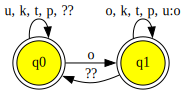

In [7]:
uo2.view()

The `//` replacement rule matches the left context
on the lower side.  This makes vowel harmony propagate.
Vowel harmony in natural languages can be of either kind.

In [8]:
uo3 = hfst.regex('u -> o \/ o C* _ C* o',definitions=defs)
defs['uo3'] = uo3

In [11]:
uo4 = hfst.regex('u -> o || o C* _ C* o',definitions=defs)
defs['uo4'] = uo4

In [9]:
bokuto = hfst.regex('[{bokuto} .o. uo3].l',
                         definitions=defs)
list(bokuto.extract_paths().keys())

['bokoto']

In [37]:
bokuputo = hfst.regex('[{bokupupuputo} .o. uo3].l',
                         definitions=defs)
list(bokuputo.extract_paths().keys())

['bokopopopoto']

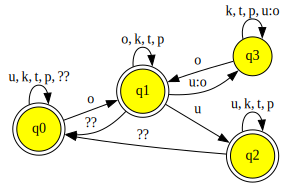

In [10]:
uo3.view()

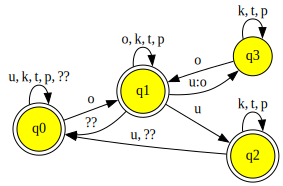

In [12]:
uo4.view()

In [15]:
bokuputo = hfst.regex('[{ubokupupuputou} .o. uo3].l',
                         definitions=defs)
list(bokuputo.extract_paths().keys())

['ubokopopopotou']

It's not what I expected.

#### Epenthesis

In [16]:
vowel = hfst.regex('i | u | o')
defs['V'] = vowel
ep = hfst.regex('[..] -> i || C _ C',
                         definitions=defs)
defs['ep'] = ep

In [17]:
result = hfst.regex('[{kuttppp} .o. ep].l',
                         definitions=defs)
list(result.extract_paths().keys())

['kutitipipip']

In [22]:
syl = hfst.regex('[a +] -> A || C _',
                         definitions=defs)
defs['syl'] = syl

In [24]:
result = hfst.regex('[{kaaat} .o. syl].l',
                         definitions=defs)
list(result.extract_paths().keys())

['kAaat', 'kAat', 'kAt']

In [25]:
syl2 = hfst.regex('[a +] @-> A || C _',
                         definitions=defs)
defs['syl2'] = syl2

In [26]:
result = hfst.regex('[{kaaat} .o. syl2].l',
                         definitions=defs)
list(result.extract_paths().keys())

['kAt']

### Load English

In [51]:
istream = hfst.HfstInputStream('/local/teach/cl23/H/H3/English')
English = istream.read()
istream.close()

In [52]:
defs['English'] = English

In [53]:
def sample_input(x,n=8,cycles=3):
        x2 = x.copy()
        x2.input_project()
        x2.minimize()
        return(random.sample(set(x2.extract_paths(max_cycles=3).keys()),n))
def sample_output(x,n=8,cycles=3):
        x2 = x.copy()
        x2.output_project()
        x2.minimize()
        return(random.sample(set(x2.extract_paths(max_cycles=3).keys()),n))

In [50]:
sample_input(English)

['framin|g',
 'dinapoli',
 'sorkin',
 'filip|pel|lo',
 'emporia',
 'markel|l',
 's|houlde|r',
 'fe|arin|g']

In [67]:
Vow0 = hfst.regex('[AH0| IH0| ER0| IY0| OW0| AA0| EH0| UW0| AE0| AO0| AY0| EY0| AW0| UH0| OY0]')
Vow1 = hfst.regex('[EH1| AE1| AA1| IH1| IY1| EY1| OW1| AO1| AY1| AH1| UW1| ER1| AW1| UH1| OY1]')
Vow2 = hfst.regex('[EH2| EY2| AE2| AY2| AA2| IH2| OW2| IY2| AO2| UW2| AH2| AW2| ER2| UH2| OY2]')
Gli = hfst.regex('[R| W| Y]')
Nas = hfst.regex('[N| M| NG]')
Obs = hfst.regex('[S| L| T| K| D| Z| B| P| F| G| V| HH| SH| JH| CH| TH| DH| ZH]')
Phone = hfst.regex('[AH0| N| S| L| T| R| K| D| IH0| M| Z| ER0| IY0| B| EH1| P| AE1| AA1| IH1| F| G| V| IY1| NG| HH| EY1| W| SH| OW1| OW0| AO1| AY1| AH1| UW1| JH| Y| CH| AA0| ER1| EH2| EY2| AE2| AY2| AA2| EH0| IH2| TH| AW1| OW2| UW0| IY2| AO2| AE0| UH1| AO0| AY0| UW2| AH2| EY0| OY1| AW2| DH| ZH| ER2| UH2| AW0| UH0| OY2| OY0]')
defs["Vow0"]=Vow0
defs["Vow1"]=Vow1
defs["Vow2"]=Vow2
defs["Vow"]=Vow
defs["Gli"]=Gli
defs["Nas"]=Nas
defs["Obs"]=Obs
defs["Phone"]=Phone



In [71]:
cvc = hfst.regex('English .o. [Obs Vow1 Obs]',
                         definitions=defs)
sample_input(cvc)

['hoc|k', 'sahl', 's|hep|p', 'feet', 'ja|ys', 's|hap', 'he|at|h', 'fake']

In [74]:
sample_input(cvc)

['sikh', 'hu|rl', 'lees', 'to|yed', 'to|ol', 'seip|p', 'pa|il|le', 'poac|h']

In [75]:
sample_output(cvc)

['BAW1T', 'FAW1T', 'HHAH1SH', 'PUH1SH', 'PAE1CH', 'BEY1L', 'SIY1F', 'KIH1SH']

In [76]:
Vow = hfst.regex('[Vow0 | Vow1 | Vow2]')
defs['Vow'] = Vow

In [77]:
VowAA = hfst.regex('[AA0 | AA1 | AA2]')
VowAE = hfst.regex('[AE0 | AE1 | AE2]')
VowAH = hfst.regex('[AH0 | AH1 | AH2]')
VowAO = hfst.regex('[AO0 | AO1 | AO2]')
VowAW = hfst.regex('[AW0 | AW1 | AW2]')
VowAY = hfst.regex('[AY0 | AY1 | AY2]')
VowEH = hfst.regex('[EH0 | EH1 | EH2]')
VowER = hfst.regex('[ER0 | ER1 | ER2]')
VowEY = hfst.regex('[EY0 | EY1 | EY2]')
VowIH = hfst.regex('[IH0 | IH1 | IH2]')
VowIY = hfst.regex('[IY0 | IY1 | IY2]')
VowOW = hfst.regex('[OW0 | OW1 | OW2]')
VowOY = hfst.regex('[OY0 | OY1 | OY2]')
VowUH = hfst.regex('[UH0 | UH1 | UH2]')
VowUW = hfst.regex('[UW0 | UW1 | UW2]')

In [78]:
defs["Vow0"]=Vow0
defs["Vow1"]=Vow1
defs["Vow2"]=Vow2
defs["Vow"]=Vow
defs["Gli"]=Gli
defs["Nas"]=Nas
defs["Obs"]=Obs
defs["Phone"]=Phone
defs["VowAA"]=VowAA
defs["VowAE"]=VowAE
defs["VowAH"]=VowAH
defs["VowAO"]=VowAO
defs["VowAW"]=VowAW
defs["VowAY"]=VowAY
defs["VowEH"]=VowEH
defs["VowER"]=VowER
defs["VowEY"]=VowEY
defs["VowIH"]=VowIH
defs["VowIY"]=VowIY
defs["VowOW"]=VowOW
defs["VowOY"]=VowOY
defs["VowUH"]=VowUH
defs["VowUW"]=VowUW

In [86]:
cic = hfst.regex('English .o. [Obs VowIH Obs]',
                         definitions=defs)

In [88]:
sample_input(cic)

['sic|k', 'fit|he', 's|chic|k', 'kis', 'pil|le', 'bib|b', 'sig', 'dig']

In [89]:
cvc = hfst.regex('English .o. [Obs Vow1 Obs]',
                         definitions=defs)

In [90]:
sample_input(cvc)

['t|huot', 'pe|rt|h', 'dase', 'zos|s', 'co|op', 'haac|ke', 'vic', 'sis']

In [124]:
cvc = hfst.regex('English .o. [Obs Vow1 Obs]',
                         definitions=defs)

In [113]:
space = hfst.regex('[..] -> " " || Phone _ Phone',
                         definitions=defs)
defs["space"]=space

In [120]:
cvcs = hfst.regex('English .o. [Obs Vow1 Obs]',
                         definitions=defs)
cvcs.minimize()

In [125]:
cvc.extract_paths(max_number=12,output='raw',random=True)

((0.0, (("'", '@_EPSILON_SYMBOL_@'), ('t', 'T'), ('i', 'IH1'), ('l', 'L'))),
 (0.0, (('b', 'B'), ('e|r', 'ER1'), ('c', 'K'), ('h', '@_EPSILON_SYMBOL_@'))),
 (0.0, (('c', 'K'), ('o|u', 'AW1'), ('s', 'S'), ('e', '@_EPSILON_SYMBOL_@'))),
 (0.0, (('c', 'S'), ('.', 'IY1'), ("'|s", 'Z'))),
 (0.0, (('c|h', 'CH'), ('a', 'AA1'), ('z|z', 'Z'))),
 (0.0, (('c|h', 'CH'), ('e|r', 'ER1'), ('t', 'T'))),
 (0.0, (('c|h', 'CH'), ('o|w', 'AW1'), ('s', 'Z'))),
 (0.0,
  (('c|h', 'SH'), ('a|i', 'EY1'), ('s', 'Z'), ('e', '@_EPSILON_SYMBOL_@'))),
 (0.0, (('c|h', 'SH'), ('e', 'EH1'), ('f', 'F'))),
 (0.0, (('c|h', 'SH'), ('i', 'IY1'), ('c', 'K'))),
 (0.0, (('c|z', 'CH'), ('e', 'EH1'), ('c', 'K'), ('h', '@_EPSILON_SYMBOL_@'))),
 (0.0, (('c|z', 'CH'), ('y', 'IH1'), ('z', 'Z'))))

In [ ]:
can = hfst.regex('${can} .o. English ',
                         definitions=defs)

In [91]:
cvc = hfst.regex('${can} .o. English', definitions=defs)

Help on HfstTransducer in module libhfst_dev object:

class HfstTransducer(builtins.object)
 |  HfstTransducer(*args)
 |  
 |  A synchronous finite-state transducer.
 |  
 |  Methods defined here:
 |  
 |  __del__ lambda self
 |  
 |  __getattr__ lambda self, name
 |  
 |  __init__(self, *args)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__ = _swig_repr(self)
 |  
 |  __setattr__ lambda self, name, value
 |  
 |  __str__(self)
 |      An AT&T representation of the transducer.
 |      
 |      Defined for print command. An example:
 |      
 |           >>> print(hfst.regex('[foo:bar::2]+'))
 |           0       1       foo     bar     2.000000
 |           1       1       foo     bar     2.000000
 |           1       0.000000 Todo
 |      Works only for small transducers.
 |  
 |  compare(self, arg2, harmonize=True)
 |      Whether this transducer and *another* are equivalent.
 |      
 |      Parameters
 |      ----------
 |      * `another` :